# PyTorchで線形回帰　予測モデルをニューラルネットワークで構築
## 損失関数：MSE、最適化関数（オプティマイザ）：SGD

# 予習課題内容
- 動作確認
- （1）に回答を挿入
- ネットワークモデルの定義箇所に印を付ける　付け方自由
- 損失関数、最適化関数の実装箇所に印を付ける　
- num_epoch：学習回数、lr：学習率の値を変更し、結果を比較する。

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 1. データセットを用意（作成する）

In [29]:
torch.manual_seed(123) 

In [30]:

a = 2 # とりあえずの重みを設定
b = 1 # とりあえずの切片を設定

tensor_x = torch.linspace(0, 1, 500)

x = tensor_x.view(500, 1) # （1）なぜ 100 x 1のテンソルに変換するのか　100とは何か　1とは何か

eps = torch.randn(500, 1)
y = a * x + b + eps

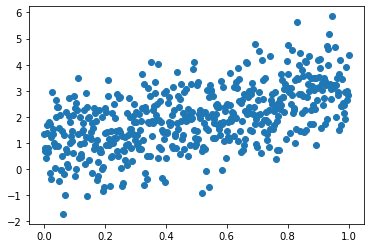

In [31]:
plt.scatter(x, y)

## 2．ネットワークモデルの定義

In [32]:
class Nakamura_LR(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        output = self.linear(x)
        return output

In [33]:
model = Nakamura_LR()

## 現時点でのネットワークモデルの性能をチェックする

In [34]:
x_test = torch.tensor([1.0]) 
x_test

tensor([1.])

In [35]:
model(x_test) 

tensor([0.4985], grad_fn=<AddBackward0>)

In [36]:
x2 = torch.linspace(0, 1, 500).view(500, 1)

In [37]:
x2.size()

torch.Size([500, 1])

In [38]:
y_pred = model(x2)

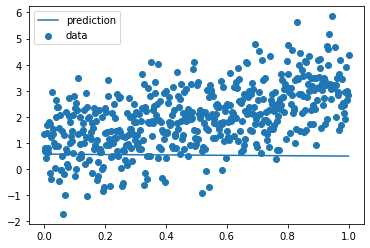

In [39]:
plt.plot(x2, y_pred.detach(), label="prediction")
plt.scatter(x, y, label="data")
plt.legend()

In [40]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [41]:
losses = []
num_epoch = 10000
for epoch in range(num_epoch):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print("epoch: {}, loss: {}".format(epoch, loss.item()))
        losses.append(loss.item())

epoch: 0, loss: 3.529277801513672
epoch: 10, loss: 3.4156265258789062
epoch: 20, loss: 3.3075709342956543
epoch: 30, loss: 3.204833745956421
epoch: 40, loss: 3.1071529388427734
epoch: 50, loss: 3.0142743587493896
epoch: 60, loss: 2.9259650707244873
epoch: 70, loss: 2.84199595451355
epoch: 80, loss: 2.7621538639068604
epoch: 90, loss: 2.686232805252075
epoch: 100, loss: 2.6140408515930176
epoch: 110, loss: 2.5453925132751465
epoch: 120, loss: 2.4801113605499268
epoch: 130, loss: 2.4180331230163574
epoch: 140, loss: 2.358997344970703
epoch: 150, loss: 2.30285382270813
epoch: 160, loss: 2.2494606971740723
epoch: 170, loss: 2.1986796855926514
epoch: 180, loss: 2.1503841876983643
epoch: 190, loss: 2.10444974899292
epoch: 200, loss: 2.0607595443725586
epoch: 210, loss: 2.019202709197998
epoch: 220, loss: 1.9796736240386963
epoch: 230, loss: 1.9420721530914307
epoch: 240, loss: 1.906302571296692
epoch: 250, loss: 1.8722747564315796
epoch: 260, loss: 1.8399029970169067
epoch: 270, loss: 1.8091

epoch: 2240, loss: 1.1350791454315186
epoch: 2250, loss: 1.1347116231918335
epoch: 2260, loss: 1.134346604347229
epoch: 2270, loss: 1.133981466293335
epoch: 2280, loss: 1.1336184740066528
epoch: 2290, loss: 1.1332554817199707
epoch: 2300, loss: 1.1328939199447632
epoch: 2310, loss: 1.1325334310531616
epoch: 2320, loss: 1.132173776626587
epoch: 2330, loss: 1.1318151950836182
epoch: 2340, loss: 1.1314575672149658
epoch: 2350, loss: 1.1311012506484985
epoch: 2360, loss: 1.1307454109191895
epoch: 2370, loss: 1.1303908824920654
epoch: 2380, loss: 1.1300370693206787
epoch: 2390, loss: 1.129684329032898
epoch: 2400, loss: 1.1293323040008545
epoch: 2410, loss: 1.1289814710617065
epoch: 2420, loss: 1.1286319494247437
epoch: 2430, loss: 1.1282827854156494
epoch: 2440, loss: 1.1279345750808716
epoch: 2450, loss: 1.1275880336761475
epoch: 2460, loss: 1.1272417306900024
epoch: 2470, loss: 1.1268965005874634
epoch: 2480, loss: 1.1265519857406616
epoch: 2490, loss: 1.1262089014053345
epoch: 2500, los

epoch: 4950, loss: 1.064237356185913
epoch: 4960, loss: 1.064058780670166
epoch: 4970, loss: 1.063880443572998
epoch: 4980, loss: 1.0637023448944092
epoch: 4990, loss: 1.0635250806808472
epoch: 5000, loss: 1.0633488893508911
epoch: 5010, loss: 1.0631722211837769
epoch: 5020, loss: 1.0629963874816895
epoch: 5030, loss: 1.0628210306167603
epoch: 5040, loss: 1.0626461505889893
epoch: 5050, loss: 1.0624717473983765
epoch: 5060, loss: 1.0622975826263428
epoch: 5070, loss: 1.0621241331100464
epoch: 5080, loss: 1.0619511604309082
epoch: 5090, loss: 1.0617784261703491
epoch: 5100, loss: 1.0616066455841064
epoch: 5110, loss: 1.0614349842071533
epoch: 5120, loss: 1.0612634420394897
epoch: 5130, loss: 1.0610923767089844
epoch: 5140, loss: 1.0609222650527954
epoch: 5150, loss: 1.0607523918151855
epoch: 5160, loss: 1.0605829954147339
epoch: 5170, loss: 1.0604137182235718
epoch: 5180, loss: 1.060245394706726
epoch: 5190, loss: 1.060077428817749
epoch: 5200, loss: 1.0599095821380615
epoch: 5210, loss

epoch: 7430, loss: 1.0316863059997559
epoch: 7440, loss: 1.0315932035446167
epoch: 7450, loss: 1.0315009355545044
epoch: 7460, loss: 1.0314085483551025
epoch: 7470, loss: 1.0313163995742798
epoch: 7480, loss: 1.0312247276306152
epoch: 7490, loss: 1.0311331748962402
epoch: 7500, loss: 1.0310416221618652
epoch: 7510, loss: 1.0309503078460693
epoch: 7520, loss: 1.0308599472045898
epoch: 7530, loss: 1.0307689905166626
epoch: 7540, loss: 1.030678629875183
epoch: 7550, loss: 1.0305885076522827
epoch: 7560, loss: 1.0304983854293823
epoch: 7570, loss: 1.0304090976715088
epoch: 7580, loss: 1.030319333076477
epoch: 7590, loss: 1.0302302837371826
epoch: 7600, loss: 1.030140995979309
epoch: 7610, loss: 1.0300527811050415
epoch: 7620, loss: 1.0299640893936157
epoch: 7630, loss: 1.029875636100769
epoch: 7640, loss: 1.0297878980636597
epoch: 7650, loss: 1.0296998023986816
epoch: 7660, loss: 1.0296123027801514
epoch: 7670, loss: 1.029524803161621
epoch: 7680, loss: 1.0294378995895386
epoch: 7690, loss

epoch: 9860, loss: 1.0150173902511597
epoch: 9870, loss: 1.0149681568145752
epoch: 9880, loss: 1.014919400215149
epoch: 9890, loss: 1.0148711204528809
epoch: 9900, loss: 1.014822244644165
epoch: 9910, loss: 1.014774203300476
epoch: 9920, loss: 1.0147258043289185
epoch: 9930, loss: 1.0146777629852295
epoch: 9940, loss: 1.0146299600601196
epoch: 9950, loss: 1.0145819187164307
epoch: 9960, loss: 1.0145342350006104
epoch: 9970, loss: 1.0144867897033691
epoch: 9980, loss: 1.0144392251968384
epoch: 9990, loss: 1.0143918991088867


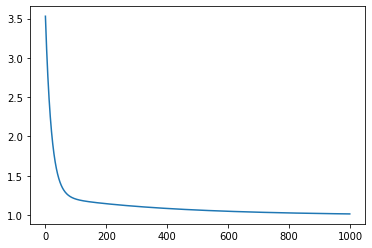

In [42]:
plt.plot(losses)

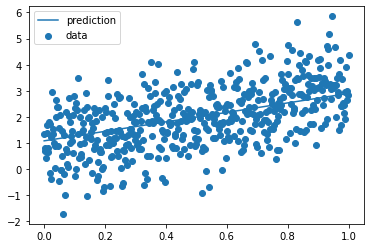

In [43]:
x_test = torch.linspace(0, 1, 500).view(500, 1)
y_test = model(x_test)
plt.plot(x_test, y_test.detach(), label="prediction")
plt.scatter(x, y, label="data")
plt.legend()